In [3]:
import imagenhancer as ie

model_path_x2 = '.\\PRJ\\RealESRGANmaster\\weights\\RealESRGAN_x2plus.pth'

enhancer = ie.RealESRGANx2(model_path = model_path_x2,scale_= 2)

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread("PedestrianGT.png")
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)


In [3]:
img224 = cv.resize(img[:224,:224,:],(224,224))
tmp = cv.resize(ie.downsampling(img224,2),(112,112))


W: 112, H: 112


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


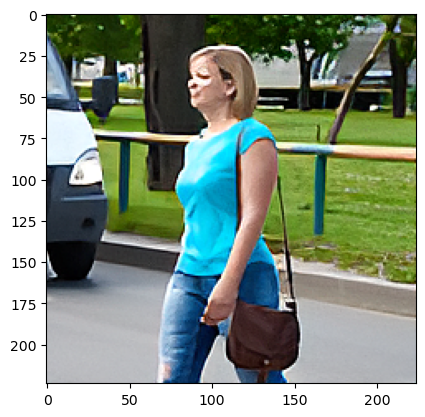

In [4]:
res = enhancer.enhance(tmp)
plt.imshow(res)

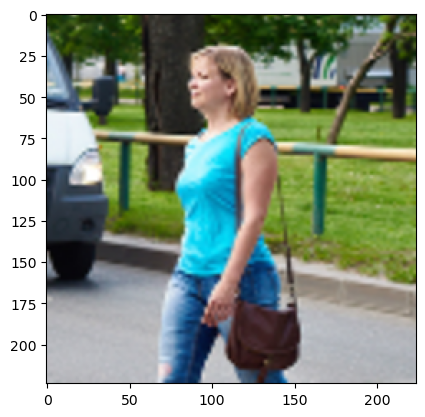

In [5]:

tmp2 = cv.resize(tmp,(224,224))
plt.imshow(tmp2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


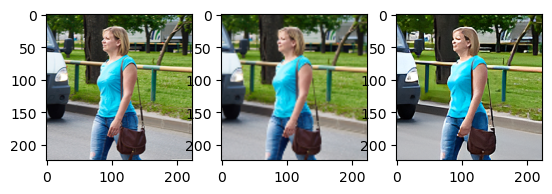

In [6]:
fig = plt.figure()

fig.add_subplot(1,3,1)
plt.imshow(img224)

fig.add_subplot(1,3,2)
plt.imshow(tmp2)

fig.add_subplot(1,3,3)
plt.imshow(res)

# Start testing of filtering part


In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import imagenhancer as ie
ped = cv.imread("317_058.jpg")
ped = cv.cvtColor(ped,cv.COLOR_BGR2RGB)

c:\Users\Leonardo\anaconda3\envs\generic\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


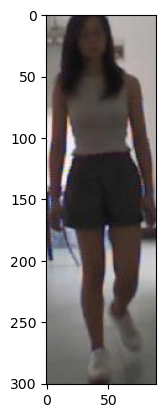

In [2]:
plt.imshow(ie.noise_addiction(ped))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


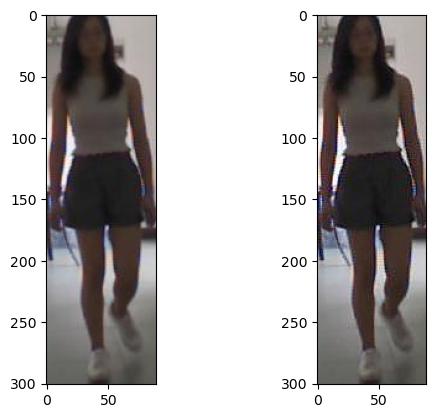

In [4]:
fig = plt.figure()

fig.add_subplot(1,2,1)
plt.imshow(ped)

fig.add_subplot(1,2,2)
plt.imshow(enhancer.filtering(ped))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


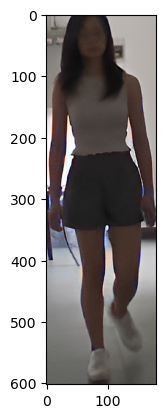

In [9]:
plt.imshow(enhancer.enhance(ped))

In [36]:
img_deb = enhancer.enhance(ie.downsampling(cv.medianBlur(ped,ksize=3),scale=2))

W: 44, H: 150


In [33]:
img_deb.shape

(340, 216, 3)

In [43]:
img_deb.shape

(300, 88, 3)

In [47]:
import numpy as np

img_deb_2 = ie.sharpening(ped)


wrt = cv.cvtColor(img_deb_2,cv.COLOR_RGB2BGR)
cv.imwrite("317_058_sharpened_direct.jpg", wrt)

True

In [41]:
plt.imshow(wrt)

NameError: name 'wrt' is not defined

W: 108, H: 170


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


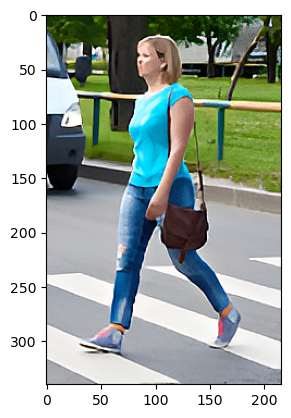

In [16]:
plt.imshow(img_deb)

In [29]:
import torch
def PSNR(input,target ):
    return -10*torch.log10(torch.mean((input - target) ** 2,dim=[0,1,2]))

In [31]:
PSNR(torch.Tensor(img_deb), torch.Tensor(img[:,:216,:]))

tensor(-27.4663)

# Start measurement
1. Degradation of all the image, simple resize, save measurements
2. From the degradated image, restore it with pyrUp (cv2) and measure it
3. Upscale from the degradated and measure
4. Filter the Upscaled ones and measure
5. Filter the pyrUp ones

In [5]:
import os
os.path.abspath(os.getcwd())

'c:\\Users\\Leonardo\\Documents\\Universita\\CVCS\\PRJ'

In [2]:
import imagenhancer as ie
import numpy as np
import torch
import matplotlib.pyplot as plt 
import cv2 as cv

model_path_x2 = '.\\RealESRGANmaster\\weights\\RealESRGAN_x2plus.pth'

enhancer = ie.RealESRGANx2(model_path = model_path_x2,scale_= 2)

In [95]:
import cv2 as cv

base_img = cv.cvtColor(cv.imread("069/cropped_rgb601.jpg"), cv.COLOR_BGR2RGB)
deg_img = ie.image_degradation(base_img)
h,w,c = base_img.shape
res_img = cv.resize(deg_img, dsize=(w,h))
pyr_img = cv.pyrUp(deg_img)
upscale_img = enhancer.upsample(deg_img)
up_filt_img = enhancer.filtering(enhancer.upsample(deg_img))
filt_up_img = enhancer.upsample(np.uint8(enhancer.filtering(deg_img).clip(0,255)))
filter_pyr_img = enhancer.filtering(pyr_img)

W: 62, H: 154


In [96]:
image_list = list()
image_list.append(base_img.astype(np.uint8))
image_list.append(res_img.astype(np.uint8))
image_list.append(pyr_img.astype(np.uint8))
image_list.append(upscale_img.astype(np.uint8))
image_list.append(up_filt_img.astype(np.uint8))
image_list.append(filt_up_img.astype(np.uint8))
image_list.append(filter_pyr_img.astype(np.uint8))




In [97]:
h,w,c = base_img.shape
w_ext=(w-1)*7
w-=1
h-=1


In [98]:
import numpy as np
full_img = np.empty((h,w_ext,c))

In [99]:
image_list[0] = image_list[0][:-1,:-1,:]
image_list[1] = image_list[1][:-1,:-1,:]

In [101]:
for i in image_list:
    print(i.shape)

(h,w,c)

(308, 124, 3)
(308, 124, 3)
(308, 124, 3)
(308, 124, 3)
(308, 124, 3)
(308, 124, 3)
(308, 124, 3)


(308, 124, 3)

In [102]:
for i in range(7):
    print(i)
    full_img[:,i*w:(i+1)*w,:] = image_list[i]

0
1
2
3
4
5
6


"\n0: base\n1: deg + resize\n2: deg + pyrUp\n3: upscale\n4: upscale + filter -> works very bad  , remove? -> its because of the GAN's artifacts\n5: filter + upscale\n6: pyrup + sharpening\n"

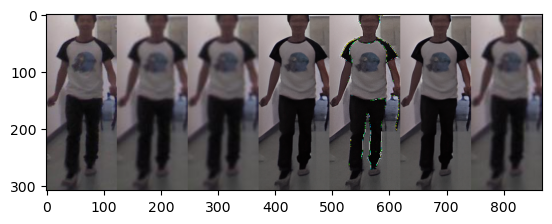

In [103]:
full_img = full_img.astype(np.uint8)
plt.imshow(full_img)
'''
0: base
1: deg + resize
2: deg + pyrUp
3: upscale
4: upscale + filter -> works very bad  , remove? -> its because of the GAN's artifacts
5: filter + upscale
6: pyrup + sharpening
'''

In [104]:
import torch
image_list_t = list()
for i in range(7):
    image_list_t.append(torch.Tensor(image_list[i]))

In [105]:
measure = list()
measure.append('0')
for i in range(6):
    measure.append(f'{(ie.PSNR(image_list_t[0],image_list_t[i+1])):.3f}')

In [106]:
measure

['0', '28.619', '31.546', '28.110', '20.089', '27.722', '32.060']

In [76]:
def plotter(image_list:list, measure:list):
    fig = plt.figure()
    k = len(image_list)
    ax=list()
    for i,img in enumerate(image_list):
        ax.append(fig.add_subplot(1,k,i+1))
        ax[i].set_title(str(measure[i]))
        plt.axis('off')
        plt.imshow(img)
    #return fig




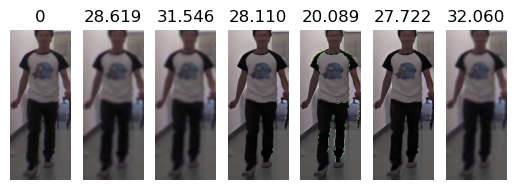

In [107]:
plotter(image_list, measure)

In [8]:
from UnpairedSR.codes.config.PDMSR import inference as pdm
import cv2 as cv
import matplotlib.pyplot as plt

base_img = cv.imread("069/cropped_rgb601.jpg")

print()
img = pdm.inf(base_img)
#img = cv.cvtColor(img, cv.COLOR_BGR2RGB)



export CUDA_VISIBLE_DEVICES=0
(309, 125, 3)


In [18]:
plt.imshow(img.reshape((base_img.shape[0],base_img.shape[1])))

ValueError: cannot reshape array of size 1854000 into shape (309,125)

In [17]:
(base_img.shape[0],base_img.shape[1])

(309, 125)

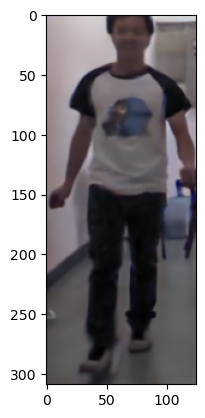

In [27]:
import torch
plt.imshow(cv.pyrDown(cv.pyrDown(img)))

c:\Users\Leonardo\anaconda3\envs\generic\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


export CUDA_VISIBLE_DEVICES=0
(309, 125, 3)
W: 62, H: 154


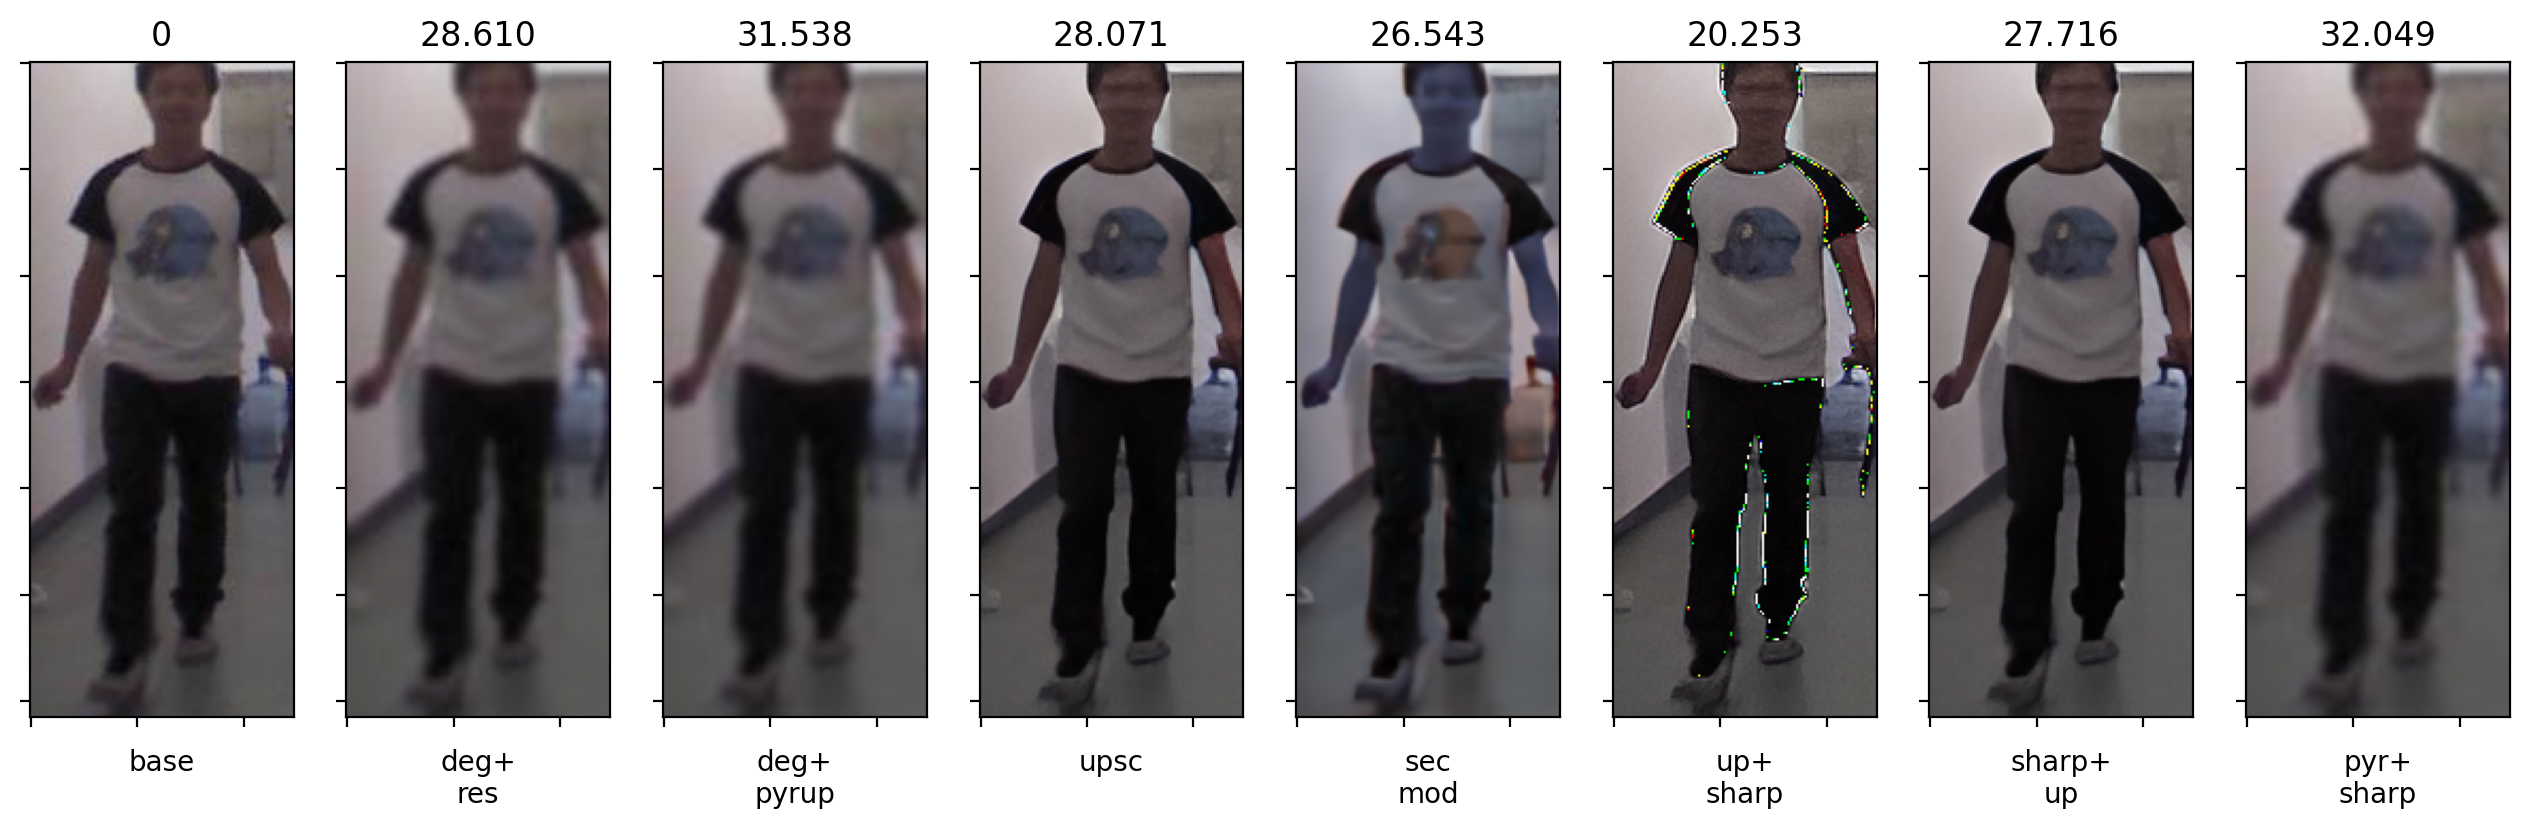

In [1]:
import plot_measure as pm

pm.elab("069/cropped_rgb601.jpg")